In [1]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", pd.NA)


In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])


In [6]:
df["TotalCharges"].isnull().sum()


11

In [7]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())



In [8]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype(int)


In [9]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)



C:\Users\rafeh\AppData\Local\Temp\ipykernel_18220\3389240528.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [10]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)



In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

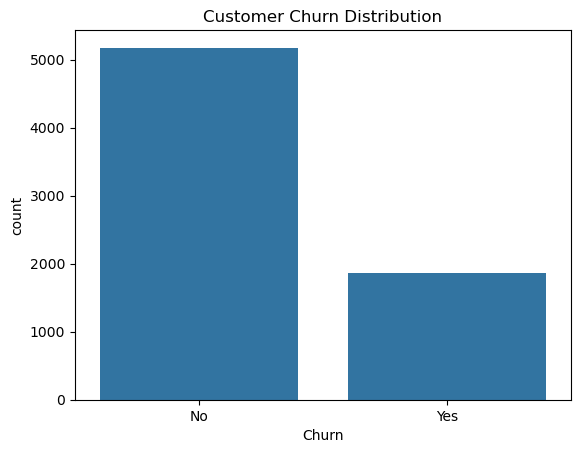

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Churn")
plt.title("Customer Churn Distribution")
plt.show()



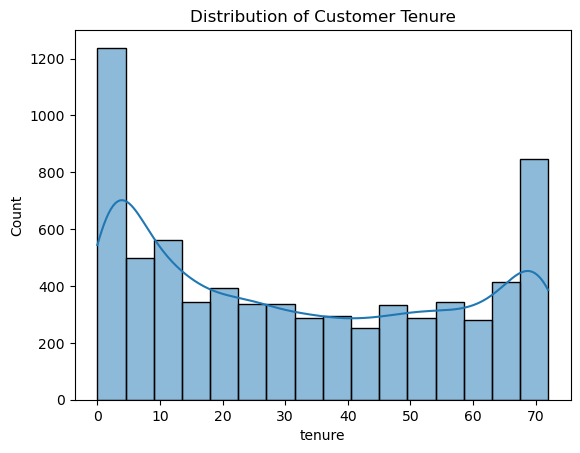

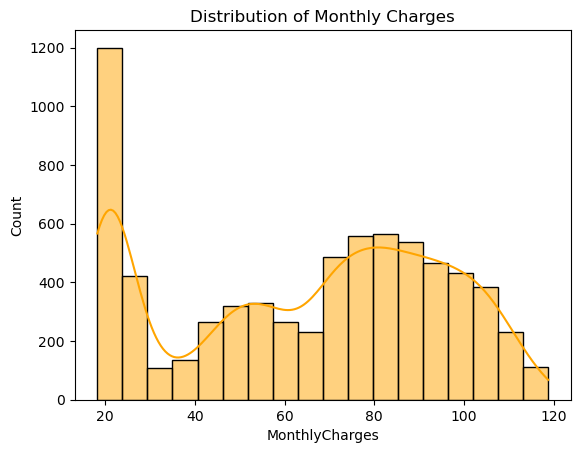

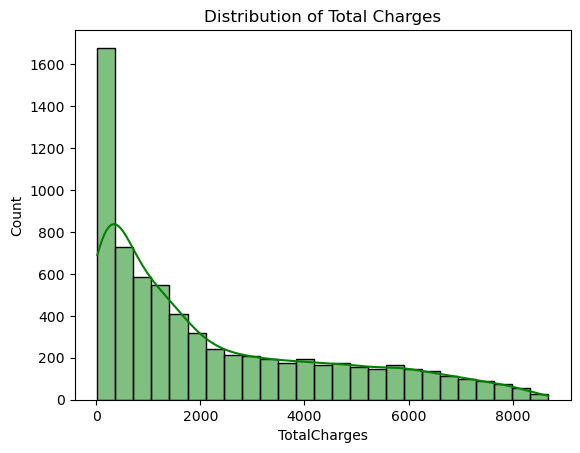

In [14]:
sns.histplot(data=df, x="tenure", kde=True)
plt.title("Distribution of Customer Tenure")
plt.show()
sns.histplot(data=df, x="MonthlyCharges", kde=True, color="orange")
plt.title("Distribution of Monthly Charges")
plt.show()
sns.histplot(data=df, x="TotalCharges", kde=True, color="green")
plt.title("Distribution of Total Charges")
plt.show()


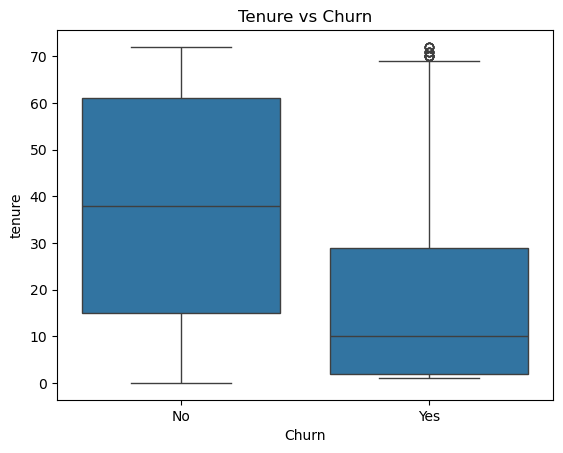

C:\Users\rafeh\AppData\Local\Temp\ipykernel_18220\964897734.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="Set2")


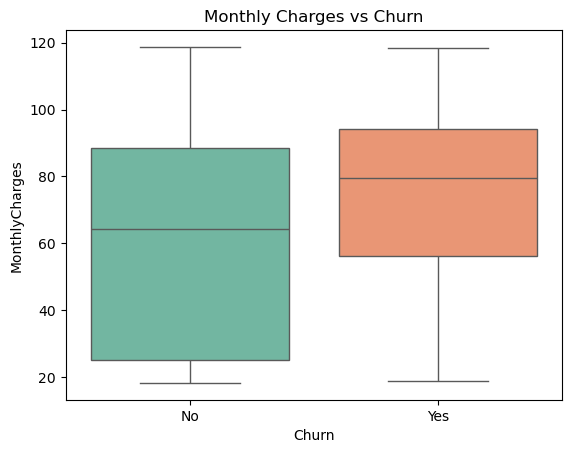

C:\Users\rafeh\AppData\Local\Temp\ipykernel_18220\964897734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="TotalCharges", palette="Set3")


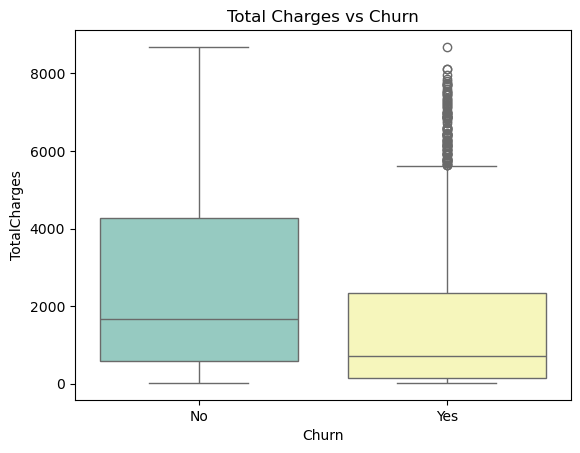

In [15]:
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure vs Churn")
plt.show()
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="Set2")
plt.title("Monthly Charges vs Churn")
plt.show()
sns.boxplot(data=df, x="Churn", y="TotalCharges", palette="Set3")
plt.title("Total Charges vs Churn")
plt.show()


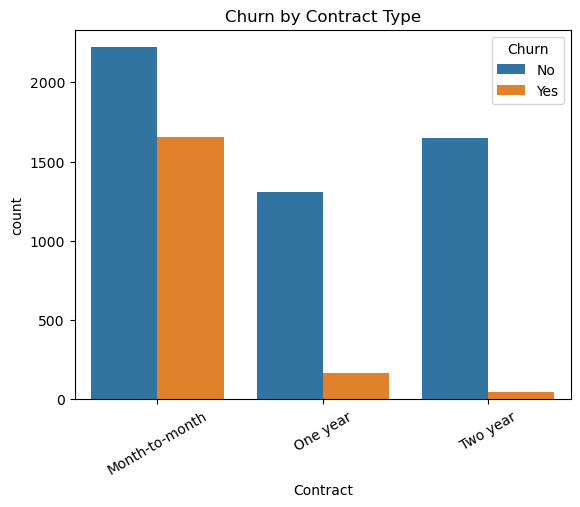

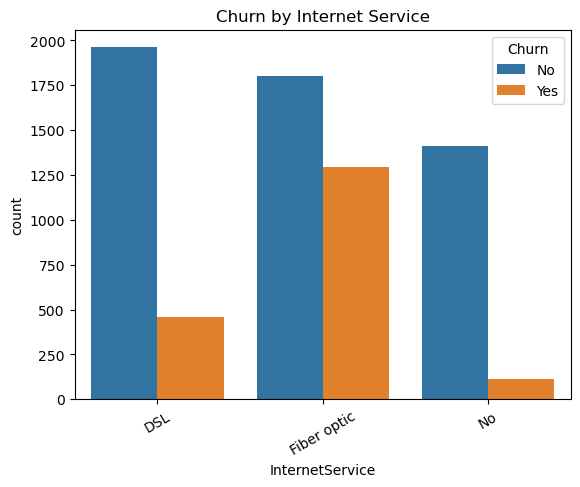

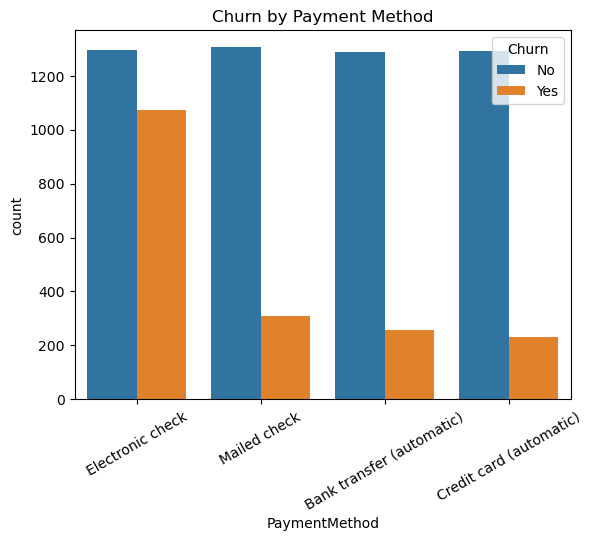

In [16]:
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.xticks(rotation=30)
plt.show()
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Churn by Internet Service")
plt.xticks(rotation=30)
plt.show()
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()

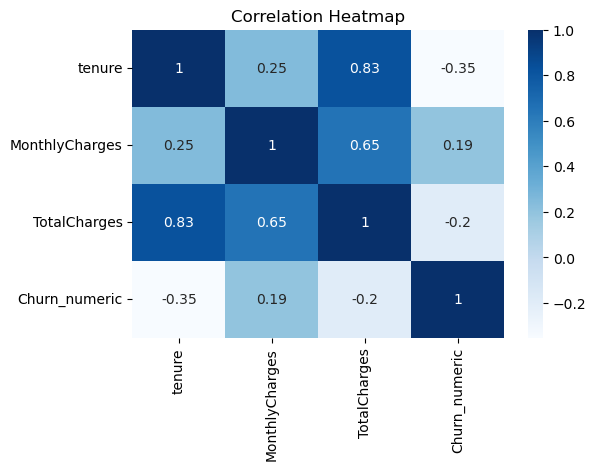

In [17]:
df["Churn_numeric"] = df["Churn"].map({"Yes": 1, "No": 0})
plt.figure(figsize=(6,4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges", "Churn_numeric"]].corr(), 
            annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


In [19]:
y = df["Churn_numeric"]
X = df.drop(["customerID", "Churn", "Churn_numeric"], axis=1)
X = pd.get_dummies(X, drop_first=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [20]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8218594748048261

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



C:\Users\rafeh\anac\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.linear_model import LogisticRegression


In [22]:
log_model = LogisticRegression(max_iter=1000)


In [23]:
log_model.fit(X_train, y_train)


C:\Users\rafeh\anac\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [24]:
from sklearn.metrics import accuracy_score, classification_report


In [25]:
log_model = LogisticRegression(max_iter=3000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8211497515968772

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [26]:
from sklearn.ensemble import RandomForestClassifier


In [27]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)


In [28]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [29]:
rf_pred = rf_model.predict(X_test)


In [30]:
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Accuracy: 0.7934705464868701

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [31]:
log_model_balanced = LogisticRegression(max_iter=3000, class_weight='balanced')
log_model_balanced.fit(X_train, y_train)

balanced_pred = log_model_balanced.predict(X_test)

print("Accuracy:", accuracy_score(y_test, balanced_pred))
print("\nClassification Report:\n", classification_report(y_test, balanced_pred))


Accuracy: 0.7494677075940384

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [32]:
rf_model_balanced = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_model_balanced.fit(X_train, y_train)

balanced_rf_pred = rf_model_balanced.predict(X_test)

print("Accuracy:", accuracy_score(y_test, balanced_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, balanced_rf_pred))


Accuracy: 0.794889992902768

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [33]:
import numpy as np

importance = pd.Series(
    log_model_balanced.coef_[0],
    index=X_train.columns
).sort_values(ascending=False)

importance.head(10)


InternetService_Fiber optic       1.154591
MultipleLines_No phone service    0.511100
StreamingMovies_Yes               0.460872
StreamingTV_Yes                   0.350523
PaymentMethod_Electronic check    0.343565
PaperlessBilling_Yes              0.314797
PhoneService_Yes                  0.295003
MultipleLines_Yes                 0.288514
SeniorCitizen                     0.155947
Partner_Yes                       0.036519
dtype: float64

In [34]:
importance.tail(10)



OnlineBackup_No internet service      -0.177524
TechSupport_No internet service       -0.177524
StreamingTV_No internet service       -0.177524
StreamingMovies_No internet service   -0.177524
OnlineSecurity_No internet service    -0.177524
InternetService_No                    -0.177524
TechSupport_Yes                       -0.256069
OnlineSecurity_Yes                    -0.343477
Contract_One year                     -0.675130
Contract_Two year                     -1.499412
dtype: float64

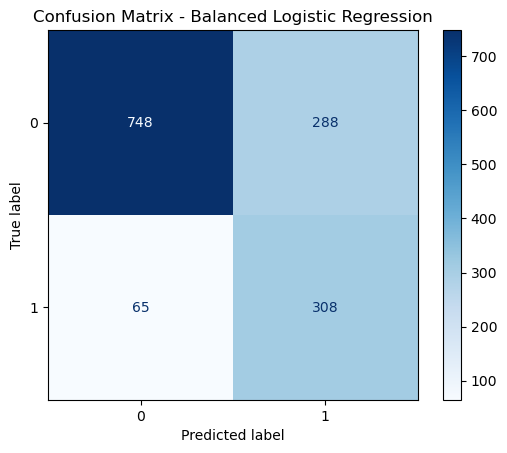

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, balanced_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Balanced Logistic Regression")
plt.show()


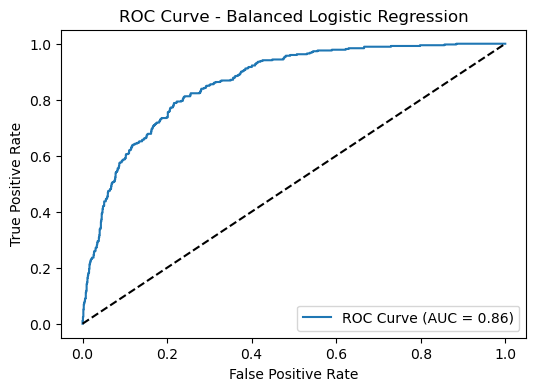

In [36]:
from sklearn.metrics import roc_curve, auc

y_prob = log_model_balanced.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Balanced Logistic Regression")
plt.legend()
plt.show()


In [37]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Balanced Logistic Regression", "Random Forest", "Balanced Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, balanced_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, balanced_rf_pred)
    ],
    "Churn Recall (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        classification_report(y_test, balanced_pred, output_dict=True)["1"]["recall"],
        classification_report(y_test, rf_pred, output_dict=True)["1"]["recall"],
        classification_report(y_test, balanced_rf_pred, output_dict=True)["1"]["recall"],
    ]
})

results


,Model,Accuracy,Churn Recall (Class 1)
0,Logistic Regression,0.821150,0.597855
1,Balanced Logistic Regression,0.749468,0.825737
2,Random Forest,0.793471,0.461126
3,Balanced Random Forest,0.794890,0.458445


In [38]:
import os
os.getcwd()


'C:\\Users\\rafeh\\customer_churn_project'

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rafeh\\customer_churn_project\\images\\churn_distribution.png'

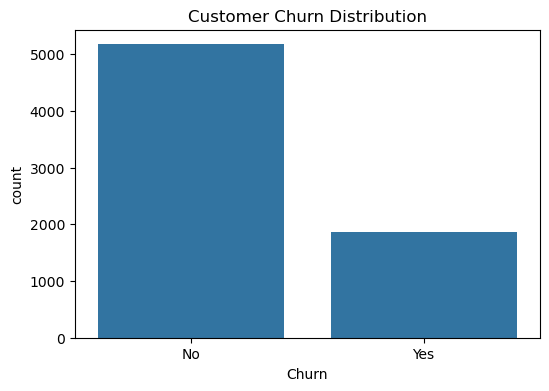

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Customer Churn Distribution")
plt.savefig("images/churn_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, balanced_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(6,4))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Balanced Logistic Regression")
plt.savefig("images/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()
from sklearn.metrics import roc_curve, auc

y_prob = log_model_balanced.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Balanced Logistic Regression")
plt.legend()
plt.savefig("images/roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()
import numpy as np

importance = pd.Series(
    log_model_balanced.coef_[0],
    index=X_train.columns
).sort_values()

plt.figure(figsize=(6,10))
importance.plot(kind="barh")
plt.title("Feature Importance (Balanced Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.savefig("images/feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()
